# Visualize Software Entropy

To be ported to one notebook with data processing.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# read example data which includes pubmed github links detected from article abstracts
df = pd.read_parquet("repository_analysis_results.parquet")
df

,Repository URL,Normalized Total Entropy,Date of First Commit,Date of Last Commit,Time of Existence (days)
0,https://github.com/jtchavisIII/CU-MSDSp,0.201187,2020-08-18,2021-04-20,245
1,https://github.com/SunXQlab/EnDecon,0.160978,2022-11-11,2023-02-27,107
2,https://github.com/ollisa/BELMM,0.054259,2023-05-11,2023-09-23,134


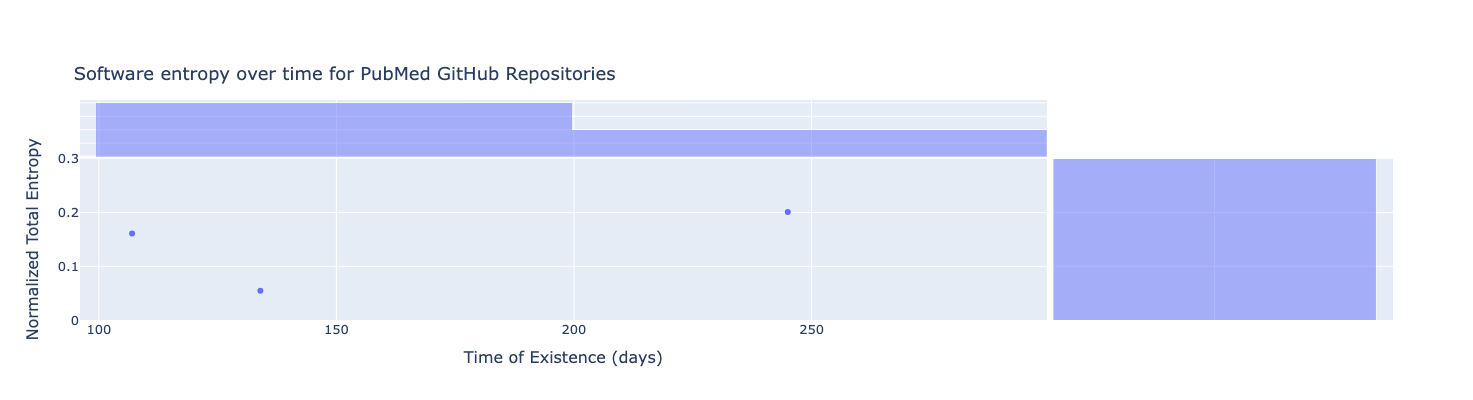

In [4]:
fig = px.scatter(
    df,
    x="Time of Existence (days)",
    y="Normalized Total Entropy",
    hover_data=["Repository URL"],
    width=800,
    height=400,
    title="Software entropy over time for PubMed GitHub Repositories",
    marginal_x="histogram",
    marginal_y="histogram",
)

fig.update_layout(
    font=dict(size=13), title={"yref": "container", "y": 0.8, "yanchor": "bottom"}
)
fig.write_image("software-information-entropy.png")
fig.show()